<a href="https://colab.research.google.com/github/InesAlarcon/SeminarioProfesional/blob/master/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169009152/169001437 [==============================] - 2s 0us/step


In [3]:
len(train_labels)
print(train_labels)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


IndexError: ignored

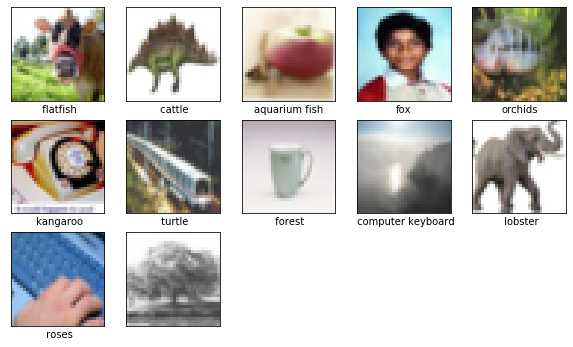

In [16]:
class_names = [ 'aquarium fish',	'orchids',	'bottles',	'apples',	'clock',	'bed',	'bee',	'bear',	'bridge',	'cloud',	'camel',	'fox',	'crab',	'baby',	'crocodile',	
               'hamster',	'maple',	'bicycle',	'lawn-mower',	' flatfish',	' poppies',	' bowls',	' mushrooms',	' computer keyboard',	' chair',	' beetle',	' leopard',	
               ' castle',	' forest',	' cattle',	' porcupine',	' lobster',	' boy',	' dinosaur',	' mouse',	' oak',	' bus',	' rocket',	' ray',	' roses',	' cans',	' oranges',	
               ' lamp',	' couch',	' butterfly',	' lion',	' house',	' mountain',	' chimpanzee',	' possum',	' snail',	' girl',	' lizard',	' rabbit',	' palm',	' motorcycle',	
               ' streetcar',	' shark',	' sunflowers',	' cups',	' pears',	' telephone',	' table',	' caterpillar',	' tiger',	' road',	' plain',	' elephant',	' raccoon',	
               ' spider',	' man',	' snake',	' shrew',	' pine',	' pickup truck',	' tank',	' trout',	' tulips',	' plates',	' sweet peppers',	' television',	' wardrobe',
               ' cockroach',	' wolf',	' skyscraper',	' sea',	' kangaroo',	' skunk',	' worm',	' woman',	' turtle',	' squirrel',	' willow',	' train',	' tractor'  ]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 4.0067 - acc: 0.0852 - val_loss: 3.5648 - val_acc: 0.1508
Epoch 2/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 3.3766 - acc: 0.1858 - val_loss: 3.1927 - val_acc: 0.2194
Epoch 3/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 3.0625 - acc: 0.2440 - val_loss: 3.0217 - val_acc: 0.2571
Epoch 4/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 2.8466 - acc: 0.2871 - val_loss: 2.8979 - val_acc: 0.2823
Epoch 5/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 2.6836 - acc: 0.3181 - val_loss: 2.7196 - val_acc: 0.3230
Epoch 6/10
50000/50000 [==============================] - 88s 2ms/sample - loss: 2.5669 - acc: 0.3429 - val_loss: 2.7016 - val_acc: 0.3238
Epoch 7/10
50000/50000 [==============================] - 88s 2ms/sample - loss: 2.4709 - acc: 0.3622 - val_loss: 2.

10000/10000 - 5s - loss: 2.6343 - acc: 0.3472


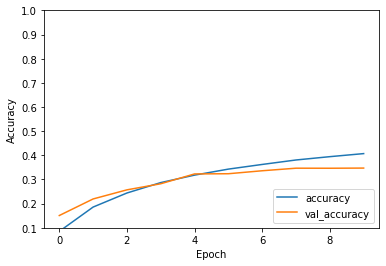

In [26]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
print(test_acc)


0.3472
